# Introduction to audio data

## Locating and opening wave files

In [1]:
import os
conda_prefix = os.getenv('CONDA_PREFIX')
conda_prefix

'/home/mauricio/miniconda3/envs/new'

In [2]:
path = os.path.join(conda_prefix, 'lib/python3.9/site-packages/scipy/io/tests/data/', '*.wav')
path

'/home/mauricio/miniconda3/envs/new/lib/python3.9/site-packages/scipy/io/tests/data/*.wav'

In [3]:
from glob import iglob
import wave

In [4]:
for file_path in iglob(path):
    print(f'OPENING {file_path}...')
    try:
        wave_file = wave.open(file_path, "r")
    except:
        continue
    print(f'\n\tFIRST 10 BYTES:{wave_file.readframes(-1)[:10]}\n')
    wave_file.close()

OPENING /home/mauricio/miniconda3/envs/new/lib/python3.9/site-packages/scipy/io/tests/data/test-44100Hz-2ch-32bit-float-le.wav...
OPENING /home/mauricio/miniconda3/envs/new/lib/python3.9/site-packages/scipy/io/tests/data/test-8000Hz-le-1ch-1byte-ulaw.wav...
OPENING /home/mauricio/miniconda3/envs/new/lib/python3.9/site-packages/scipy/io/tests/data/test-8000Hz-le-5ch-9S-5bit.wav...

	FIRST 10 BYTES:b'\x80\x80\x80\x80\x80\xd8\xf8\xd8\x80\xb0'

OPENING /home/mauricio/miniconda3/envs/new/lib/python3.9/site-packages/scipy/io/tests/data/test-8000Hz-le-3ch-5S-24bit.wav...

	FIRST 10 BYTES:b'\x00\x00\x80\x01\x00\x80\xfe\xff\xff\x00'

OPENING /home/mauricio/miniconda3/envs/new/lib/python3.9/site-packages/scipy/io/tests/data/test-44100Hz-2ch-32bit-float-be.wav...
OPENING /home/mauricio/miniconda3/envs/new/lib/python3.9/site-packages/scipy/io/tests/data/test-8000Hz-le-1ch-10S-20bit-extra.wav...

	FIRST 10 BYTES:b'\xf0\xff\x7f\x10\x00\x80\xf8\xff?\x08'

OPENING /home/mauricio/miniconda3/envs/new/li

## Frequency examples
* Streaming songs have a frequency of 32 kHz
* Audiobooks and spoken language are between 8 and 16 kHz

> An audio file of 2 seconds duration and frequency 48Khz sampling rate has 96,000 pieces of information (chunks)

## Importing an audio file

In [5]:
!ls -la good-morning.wav

-rw-rw-r-- 1 mauricio mauricio 500012 Dec 30 01:23 good-morning.wav


In [6]:
import wave
wave_obj = wave.open('good-morning.wav', 'r')
type(wave_obj)

wave.Wave_read

In [7]:
# Read all frames from wave object 
wave_bytes = wave_obj.readframes(-1)
# View first 10 frames
print(wave_bytes[:10])

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'


In [8]:
len(wave_bytes)

499968

## Get attributes

In [9]:
wave_obj.getnchannels() # the number of audio channels

2

In [10]:
wave_obj.getsampwidth() # the number of bytes per audio sample

2

In [11]:
wave_obj.getframerate() # the sampling frequency

48000

In [12]:
wave_obj.getnframes() # the number of audio frames

124992

In [13]:
wave_obj.getcomptype() # the AIFF-C compression type ('NONE' if AIFF)

'NONE'

## Converting bytes to integers
* Can't use bytes
* Convert bytes to integers using numpy
* Dinamically find the integer type multiplying sample width by 8 bits

In [14]:
import numpy as np
# Convert from bytes to integers
wave_array = np.frombuffer(wave_bytes, dtype=f'int{wave_obj.getsampwidth() * 8}')
# Show the first 10 items
wave_array[:10]

array([ -3,  -5,  -8,  -8,  -9, -13,  -8, -10,  -9, -11], dtype=int16)

In [15]:
len(wave_array)

249984

## Finding the duration

$$Duration = length\ of\ wave\ object\ array \div Frame\ rate \div Number\ of\ channels$$

In [16]:
len(wave_array) / wave_obj.getframerate() / wave_obj.getnchannels()

2.604

$$Duration\ of\ audio = Number\ of\ frames\ \div Frame\ rate$$

In [17]:
wave_obj.getnframes() / wave_obj.getframerate()

2.604

## Finding sound wave timestamps

In [18]:
# Get the timestamps of the good morning sound wave
wave_ts = np.linspace(start=0,
                      #stop = len(wave_array) / wave_obj.getframerate() / wave_obj.getnchannels(),
                      stop=wave_obj.getnframes() / wave_obj.getframerate(),
                      # num=len(wave_array)
                      num=wave_obj.getnframes() 
                     )
# wave_ts = np.linspace(start=0,
#                       stop=wave_obj.getnframes() / wave_obj.getframerate(),
#                       num=wave_obj.getnframes())
print(len(wave_ts))
wave_ts[:10]

124992


array([0.000000e+00, 2.083350e-05, 4.166700e-05, 6.250050e-05,
       8.333400e-05, 1.041675e-04, 1.250010e-04, 1.458345e-04,
       1.666680e-04, 1.875015e-04])

In [19]:
wave_ts[-1]

2.604

## Visualizing sound waves

### Considering actual number of channels

In [20]:
wave_ts = np.linspace(start=0,
                      stop=wave_obj.getnframes() / wave_obj.getframerate(),
                      num=wave_obj.getnframes())

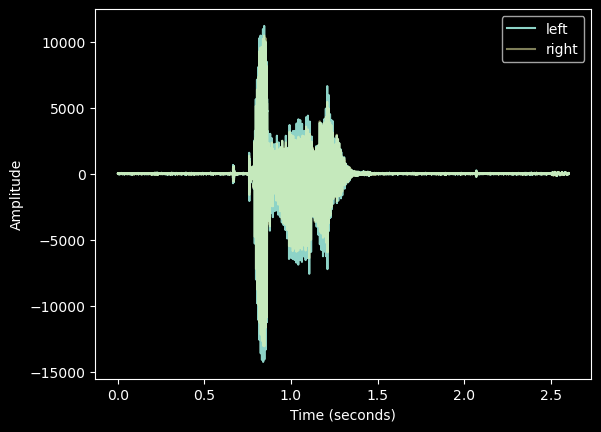

In [21]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.plot(wave_ts, wave_array[::2], label='left')
plt.plot(wave_ts, wave_array[1::2], label='right', alpha=0.5)
plt.legend()
plt.show()

### Comparing two audios

In [22]:
gm_wave = wave.open('good-morning.wav', 'r')
print(gm_wave.getparams())
gm_array = np.frombuffer(gm_wave.readframes(-1),
                         dtype=f'int{gm_wave.getsampwidth() * 8}')
gm_ts = np.linspace(start=0,
                    stop=gm_wave.getnframes() / gm_wave.getframerate(),
                    num=gm_wave.getnframes())

ga_wave = wave.open('good-afternoon.wav', 'r')
print(ga_wave.getparams())
ga_array = np.frombuffer(ga_wave.readframes(-1),
                         dtype=f'int{ga_wave.getsampwidth() * 8}')
ga_ts = np.linspace(start=0,
                    stop=ga_wave.getnframes() / ga_wave.getframerate(),
                    num=ga_wave.getnframes())

_wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=124992, comptype='NONE', compname='not compressed')
_wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=166144, comptype='NONE', compname='not compressed')


In [23]:
len(ga_ts), len(ga_array)

(166144, 332288)

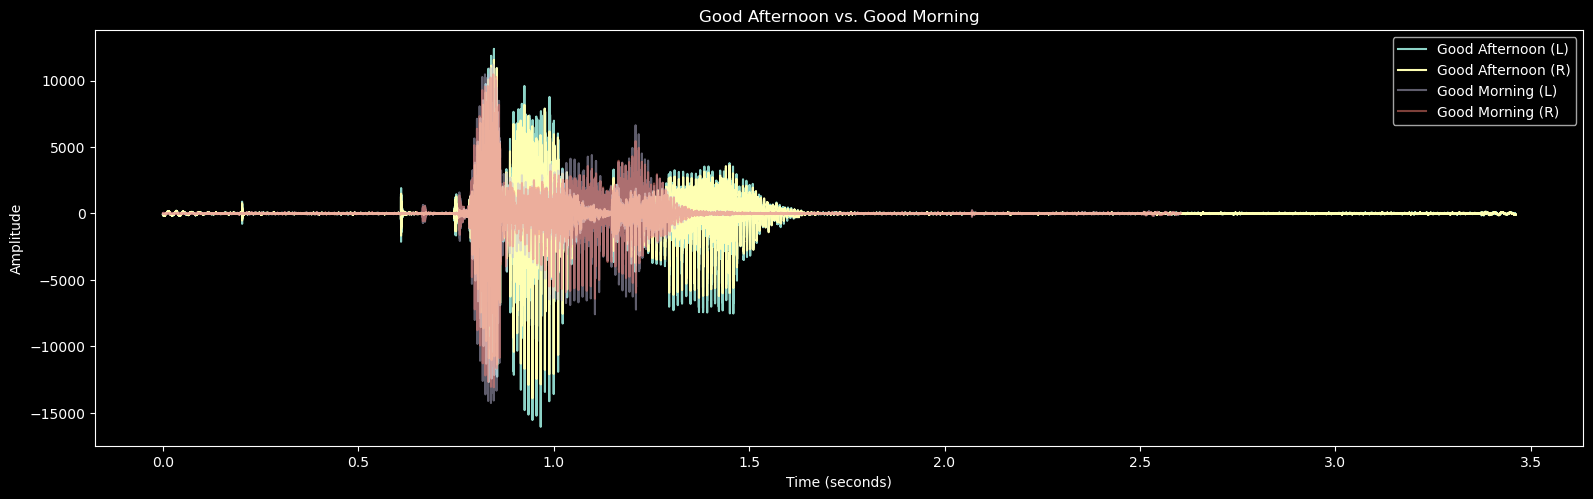

In [24]:
plt.figure(figsize=(19.2, 10.8/2))
plt.title("Good Afternoon vs. Good Morning")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
# Add good morning and good afternoon values
plt.plot(ga_ts, ga_array[::2], label ="Good Afternoon (L)" )
plt.plot(ga_ts, ga_array[1::2], label ="Good Afternoon (R)")
plt.plot(gm_ts, gm_array[::2], label="Good Morning (L)", alpha=0.5)
plt.plot(gm_ts, gm_array[1::2], label="Good Morning (R)", alpha=0.5)
# Create a legend and show our plot
plt.legend()
plt.show()

# SpeechRecognition

Speech recognition engine/API support:

* CMU Sphinx (http://cmusphinx.sourceforge.net/wiki/) (works offline)
* Google Speech Recognition
* Google Cloud Speech API (https://cloud.google.com/speech/)
* Wit.ai (https://wit.ai/)
* Microsoft Azure Speech (https://azure.microsoft.com/en-us/services/cognitive-services/speech/)
* Microsoft Bing Voice Recognition (Deprecated) (https://www.microsoft.com/cognitive-services/en-us/speech-api)
* Houndify API (https://houndify.com/)
* IBM Speech to Text (http://www.ibm.com/smarterplanet/us/en/ibmwatson/developercloud/speech-to-text.html)
* Snowboy Hotword Detection (https://github.com/seasalt-ai/snowboy) (works offline)
* Tensorflow (https://www.tensorflow.org/)
* Vosk API (https://github.com/alphacep/vosk-api/) (works offline)
* OpenAI whisper (https://github.com/openai/whisper) (works offline)

In [25]:
import speech_recognition as sr

In [26]:
# Create an instance of Recognizer
recognizer = sr.Recognizer()
# Set the energy threshold
recognizer.energy_threshold = 300

The energy threshold can be thought of as the loudness of audio which is considered speech.  
Values below the threshold are considered silence, values above are considered speech.  
A silent room is typically between 0 and 100.  
SpeechRecognition's documentation recommends 300 as a starting value which covers most speech files.  
The energy threshold value will adjust automatically as the recognizer listens to an audio file. 

In [27]:
with sr.AudioFile('clean-support-call.wav') as audio_file:
    audio_data = recognizer.record(audio_file) #duration=None, offset=None
audio_data

In [28]:
recognizer.recognize_google(audio_data=audio_data,
                            language="en-US")

result2:
{   'alternative': [   {   'confidence': 0.987629,
                           'transcript': "hello I'd like to get some help "
                                         'setting up my account please'}],
    'final': True}


"hello I'd like to get some help setting up my account please"

In [29]:
with sr.AudioFile('30-seconds-of-nothing-16k.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
recognizer.recognize_google(audio_data=audio_data, language="en-US")

result2:
{   'alternative': [   {   'confidence': 0.86179978,
                           'transcript': 'this ODI fall has 30 seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'this audio fall has 30 seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'this audiophile has 30 seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'this ODI fall has thirty seconds of '
                                         'nothing at the end of it'},
                       {   'transcript': 'disorder I fall has 30 seconds of '
                                         'nothing at the end of it'}],
    'final': True}


'this ODI fall has 30 seconds of nothing at the end of it'

In [30]:
with sr.AudioFile('static-out-of-warranty.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
recognizer.recognize_google(audio_data=audio_data, language="en-US")

result2:
{   'alternative': [   {   'confidence': 0.94135684,
                           'transcript': "hello I'd like to get some help with "
                                         "my device please I think it's out of "
                                         'warranty I bought it about 2 years '
                                         'ago'},
                       {   'transcript': "hello I'd like to get some help with "
                                         "my device please I think it's out of "
                                         'warranty I bought it about two years '
                                         'ago'},
                       {   'transcript': "hello I'd like to get some help with "
                                         "my device please I think it's "
                                         'out-of-warranty I bought it about 2 '
                                         'years ago'},
                       {   'transcript': "hello I'd like to get so

"hello I'd like to get some help with my device please I think it's out of warranty I bought it about 2 years ago"

## Noisy audio
If you have trouble hearing the speech, so will the APIs.  
The SpeechRecognition documentation recommends somewhere between zero point five to one second as a good starting point.

Import audio file with background nosie
```
noisy_support_call = sr.AudioFile(noisy_support_call.wav)
with noisy_support_call as source:
    # Adjust for ambient noise and record
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    noisy_support_call_audio = recognizer.record(source)
```

Recognize the audio
```
recognizer.recognize_google(noisy_support_call_audio)
```

In [31]:
with sr.AudioFile('good-morning-japanense.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
recognizer.recognize_google(audio_data=audio_data, language="en-US")

result2:
{   'alternative': [   {   'confidence': 0.98762906,
                           'transcript': 'ohayo gozaimasu'}],
    'final': True}


'ohayo gozaimasu'

In [32]:
with sr.AudioFile('good-morning-japanense.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
recognizer.recognize_google(audio_data=audio_data, language="ja")

result2:
{   'alternative': [   {'confidence': 0.91118836, 'transcript': 'おはようございます'},
                       {'transcript': 'あおはようございます'},
                       {'transcript': 'おはようございまーす'},
                       {'transcript': 'あおはようございまーす'}],
    'final': True}


'おはようございます'

In [33]:
with sr.AudioFile('leopard.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
try:
    print(recognizer.recognize_google(audio_data=audio_data, language="en-US"))
except Exception as err:
    print(f"\n\tERROR {err=}, {type(err)=}\n")


result2:
[]

	ERROR err=UnknownValueError(), type(err)=<class 'speech_recognition.UnknownValueError'>



In [34]:
with sr.AudioFile('leopard.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
try:
    print(recognizer.recognize_google(audio_data=audio_data, language="en-US", show_all=True))
except Exception as err:
    print(f"\n\tERROR {err=}, {type(err)=}\n")


[]


In [35]:
with sr.AudioFile('charlie-bit-me-5.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
try:
    print(recognizer.recognize_google(audio_data=audio_data, language="en-US"))
except Exception as err:
    print(f"\n\tERROR {err=}, {type(err)=}\n")

result2:
{   'alternative': [   {   'confidence': 0.34499702,
                           'transcript': 'charlie bit me'},
                       {'transcript': 'Charlie Batman'},
                       {'transcript': 'Batman'},
                       {'transcript': 'surely Batman'},
                       {'transcript': 'Jolly Batman'}],
    'final': True}
charlie bit me


In [36]:
with sr.AudioFile('clean-support-call.wav') as source:
      clean_support_call_audio = recognizer.record(source)
recognizer.recognize_google(clean_support_call_audio, language="en-US")

result2:
{   'alternative': [   {   'confidence': 0.987629,
                           'transcript': "hello I'd like to get some help "
                                         'setting up my account please'}],
    'final': True}


"hello I'd like to get some help setting up my account please"

In [37]:
with sr.AudioFile('noisy-support-call.wav') as source:
    noisy_support_call_audio = recognizer.record(source)
recognizer.recognize_google(noisy_support_call_audio, language="en-US", show_all=True)

{'alternative': [{'transcript': "hello I'd like to get to help setting up my account",
   'confidence': 0.94848436},
  {'transcript': "hello I'd like to get to help finding out my account"},
  {'transcript': "hello I'd like to get to help setting up my calendar"},
  {'transcript': "hello I'd like to get to help sending out my account"},
  {'transcript': "hello I'd like to get to help setting up my account."}],
 'final': True}

In [38]:
with sr.AudioFile('noisy-support-call.wav') as source:
	# Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=1)
    noisy_support_call_audio = recognizer.record(source)
recognizer.recognize_google(noisy_support_call_audio, language="en-US", show_all=True)

{'alternative': [{'transcript': "I'd like to get to help setting up my account",
   'confidence': 0.87756622},
  {'transcript': "I'd like to get to help setting up my calendar"},
  {'transcript': "I'd like to get to help setting up my Kelly"},
  {'transcript': 'I like to get to help setting up my account'},
  {'transcript': "I'd like to get to help setting up my account."}],
 'final': True}

In [39]:
with sr.AudioFile('noisy-support-call.wav') as source:
	# Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    noisy_support_call_audio = recognizer.record(source)
recognizer.recognize_google(noisy_support_call_audio, language="en-US", show_all=True)

{'alternative': [{'transcript': "hello I'd like to get to help setting up my account",
   'confidence': 0.93192369},
  {'transcript': "hello I'd like to get to help setting up my calendar"},
  {'transcript': "hello I'd like to get to help setting up my Kelly"},
  {'transcript': "hello I'd like to get to help setting up my account."},
  {'transcript': "hello I'd like to get to help setting up my account please"}],
 'final': True}

## Multiple speakers

In [40]:
with sr.AudioFile('multiple-speakers-16k.wav') as audio_file:
    audio_data = recognizer.record(audio_file)
try:
    print(recognizer.recognize_google(audio_data=audio_data, language="en-US"))
except Exception as err:
    print(f"\n\tERROR {err=}, {type(err)=}\n")

result2:
{   'alternative': [   {   'confidence': 0.75548744,
                           'transcript': "is that it doesn't recognize "
                                         'different speakers invoices it will '
                                         'just return it all as one block of '
                                         'text'},
                       {   'transcript': "is that it doesn't recognize "
                                         'different speakers invoices it will '
                                         'just return it all as one block a '
                                         'text'},
                       {   'transcript': "Lottery is that it doesn't recognize "
                                         'different speakers invoices it will '
                                         'just return it all as one block of '
                                         'text'},
                       {   'transcript': "why is that it doesn't recognize "
        

```
recognizer = sr.Recognizer()

# Multiple speakers on different files
speakers = [sr.AudioFile("speaker_0.wav"), 
            sr.AudioFile("speaker_1.wav"), 
            sr.AudioFile("speaker_2.wav")]

# Transcribe each speaker individually
for i, speaker in enumerate(speakers):
    with speaker as source:
        speaker_audio = recognizer.record(source)
    print(f"Text from speaker {i}:")
    print(recognizer.recognize_google(speaker_audio,
         				  language="en-US"))
```

# Manipulating Audio Files with PyDub

## PyDub's main class, AudioSegment

In [41]:
# Import PyDub main class
from pydub import AudioSegment

In [42]:
# Format parameter only for readability
wav_file = AudioSegment.from_file(file="wav_file.wav")
type(wav_file)

pydub.audio_segment.AudioSegment

In [43]:
# Import play function
from pydub.playback import play

In [44]:
# Play audio file
play(wav_file)

Input #0, wav, from '/tmp/tmpcj91zv2f.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:03.28, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [45]:
wav_file.frame_rate

48000

In [46]:
wav_file.channels

2

In [47]:
wav_file.sample_width

2

Max amplitude tell you the max amplitude of your audio file, which can be considered loudness and is useful for normalizing sound levels.

In [48]:
wav_file.max

8484

In [49]:
# Duration of audio file in milliseconds
len(wav_file)

3284

## Changing audio parameters

A rule of thumb is the higher the values, excluding channels, the better. You should aim for a minimum of 16,000 Hertz as the frame rate and to have your audio files in wav format. We'll see how to convert audio files using PyDub in a later lesson. 

In [50]:
# Change sample width to 1
wav_file_width_1 = wav_file.set_sample_width(1)
wav_file_width_1.sample_width

1

In [51]:
# Change sample rate
wav_file_16k = wav_file.set_frame_rate(16000)
wav_file_16k.frame_rate

16000

In [52]:
# Change number of channels
wav_file_1_channel = wav_file.set_channels(1)
wav_file_1_channel.channels

1

## Manipulating audio files with PyDub

In [75]:
wav_file = AudioSegment.from_file("wav_file.wav", type='wav')
type(wav_file)

pydub.audio_segment.AudioSegment

In [76]:
wav_file.max

8484

In [77]:
# Minus 60 dB
quiet_wav_file = wav_file - 60
quiet_wav_file.max

8

In [78]:
play(quiet_wav_file)

Input #0, wav, from '/tmp/tmpzv4bqjd3.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:03.28, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


This is wrong in course

In [79]:
# # Try to recognize quiet audio
# recognizer.recognize_google(quiet_wav_file)

AssertionError: ``audio_data`` must be audio data

## Normalize audio loudness

In [58]:
# Import AudioSegment and normalize
from pydub.effects import normalize
# Import uneven sound audio file
loud_quiet = AudioSegment.from_file("loud_then_quiet.wav")
print(loud_quiet.max)
play(loud_quiet)

Input #0, wav, from '/tmp/tmpwywstyyh.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:10.60, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


8680


In [59]:
normalized_loud_quiet = normalize(loud_quiet)
print(normalized_loud_quiet.max)
play(normalized_loud_quiet)

Input #0, wav, from '/tmp/tmp8uu1o8gj.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:10.60, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


32392


## Remixing your audio files

In [60]:
# Import audio with static at start
static_at_start = AudioSegment.from_file("static-out-of-warranty.wav")
play(static_at_start)

Input #0, wav, from '/tmp/tmpyl7vf_xz.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:10.48, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


In [61]:
# Remove the static via slicing
no_static_at_start = static_at_start[3000:]
# Check the new sound
play(no_static_at_start)

Input #0, wav, from '/tmp/tmp7u5j3hy5.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:07.47, bitrate: 1411 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 44100 Hz, 2 channels, s16, 1411 kb/s


## Combining audio files

In [62]:
# Import two audio files
wav_file_1 = AudioSegment.from_file("good-morning.wav")
wav_file_2 = AudioSegment.from_file("good-afternoon.wav")
# Combine the two audio files
wav_file_3 = wav_file_1 + wav_file_2
# Check the sound
play(wav_file_3)

Input #0, wav, from '/tmp/tmp5utcbsm_.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:06.07, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [63]:
# Combine two wav files and make the combination louder
louder_wav_file_3 = wav_file_1 + wav_file_2 + 10
play(louder_wav_file_3)

Input #0, wav, from '/tmp/tmpcwzity3h.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:06.07, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [64]:
part_1 = AudioSegment.from_file('part_1.wav')
play(part_1)

Input #0, wav, from '/tmp/tmphsvai1xh.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:08.47, bitrate: 3072 kb/s
  Stream #0:0: Audio: pcm_s32le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s32, 3072 kb/s


In [65]:
part_2 = AudioSegment.from_file('part_2.wav')
play(part_2)

Input #0, wav, from '/tmp/tmp8f2o32ro.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:03.54, bitrate: 3072 kb/s
  Stream #0:0: Audio: pcm_s32le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s32, 3072 kb/s


In [66]:
# Remove the first four seconds of part 1
part_1_removed = part_1[4000:]
# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2
play(part_3)

Input #0, wav, from '/tmp/tmpj71nzrty.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:08.01, bitrate: 3072 kb/s
  Stream #0:0: Audio: pcm_s32le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s32, 3072 kb/s


## Splitting your audio

In [70]:
# Import phone call audio
phone_call = AudioSegment.from_file("clean-support-call.wav")
# Find number of channels
phone_call.channels

2

In [71]:
# Split stereo to mono
phone_call_channels = phone_call.split_to_mono()
for phone_call in phone_call_channels:
    print(phone_call)
    play(phone_call)

Input #0, wav, from '/tmp/tmpxpcvjx0a.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:04.79, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 1 channels, s16, 768 kb/s
Input #0, wav, from '/tmp/tmpf06ydp3d.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:04.79, bitrate: 768 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 1 channels, s16, 768 kb/s


In [73]:
# Import stereo audio file and check channels
stereo_phone_call = AudioSegment.from_file('stereo_call.wav')
play(stereo_phone_call)

Input #0, wav, from '/tmp/tmpall4a6_v.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:45.50, bitrate: 1024 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 32000 Hz, 2 channels, s16, 1024 kb/s


In [74]:
print(f"Stereo number channels: {stereo_phone_call.channels}")
# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f"Split number channels: {channels[0].channels}, {channels[1].channels}")
# Save new channels separately
phone_call_channel_1 = channels[0]
play(phone_call_channel_1)
phone_call_channel_2 = channels[1]
play(phone_call_channel_2)

Stereo number channels: 2
Split number channels: 1, 1


Input #0, wav, from '/tmp/tmpmgctztwz.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:45.50, bitrate: 512 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 32000 Hz, 1 channels, s16, 512 kb/s
Input #0, wav, from '/tmp/tmp08yuif0u.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:45.50, bitrate: 512 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 32000 Hz, 1 channels, s16, 512 kb/s


## Turning it down... then up

In [80]:
volume_adjusted = AudioSegment.from_file('volume_adjusted.wav')
play(volume_adjusted)

Input #0, wav, from '/tmp/tmpzjk3y4o7.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:09.77, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [81]:
# Lower the volume by 60 dB
quiet_volume_adjusted = volume_adjusted - 20
play(quiet_volume_adjusted)

Input #0, wav, from '/tmp/tmphurrs9r1.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:09.77, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [82]:
# Increase the volume by 15 dB
louder_volume_adjusted = quiet_volume_adjusted + 30
play(louder_volume_adjusted)

Input #0, wav, from '/tmp/tmpp9in01qw.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:09.77, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


# Converting and saving audio files with PyDub

## Exporting audio files

In [1]:
from pydub import AudioSegment
# Import audio file
wav_file = AudioSegment.from_file("wav_file.wav")
# Increase by 10 decibels
louder_wav_file = wav_file + 10
# Export louder audio file
louder_wav_file.export(out_f="louder_wav_file.wav", format="wav")

<_io.BufferedRandom name='louder_wav_file.wav'>

## Reformatting and exporting multiple audio files

In [5]:
import os
def make_wav(wrong_folder_path, right_folder_path):
    # Loop through wrongly formatted files
    for file in os.scandir(wrong_folder_path):
        # Only work with files with audio extensions we're fixing
        if file.path.endswith(".mp3") or file.path.endswith(".flac"):
            # Create the new .wav filename
            out_file = right_folder_path + os.path.splitext(os.path.basename(file.path))[0] + ".wav"
            # Read in the audio file and export it in wav format
            AudioSegment.from_file(file.path).export(out_file, format="wav")
            print(f"Creating {out_file}")

In [8]:
make_wav("./", "./")

Creating ./loud_then_quiet.wav


In [10]:
from pydub import AudioSegment
from pydub.playback import play
play(AudioSegment.from_file('loud_then_quiet.wav'))

Input #0, wav, from '/tmp/tmpsnhf_cz7.wav':   0KB sq=    0B f=0/0   
  Duration: 00:00:10.60, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


## Manipulating and exporting

In [17]:
def make_no_static_louder(static_quiet, louder_no_static):
    # Loop through files with static and quiet (already in wav format)
    for file in os.scandir(static_quiet_folder_path):
        # Create new file path
        out_file = louder_no_static + os.path.splitext(os.path.basename(file.path))[0] + ".wav"
        # Read the audio file
        audio_file = AudioSegment.from_file(file.path)
        # Remove first three seconds and add 10 decibels and export
        audio_file = (audio_file[3100:] + 10).export(out_file, format="wav")
        print(f"Creating {out_file}")

## Exporting and reformatting audio files

In [55]:
AudioSegment.from_file('good-afternoon.wav').export(out_f='good-afternoon_mp3.mp3', format='mp3')

<_io.BufferedRandom name='good-afternoon_mp3.mp3'>

In [59]:
AudioSegment.from_file('good-afternoon.wav').export(out_f='good-afternoon_ogg.ogg', format='ipod')

<_io.BufferedRandom name='good-afternoon_ogg.ogg'>

In [60]:
AudioSegment.from_file('good-afternoon.wav').export(out_f='good-afternoon_m4a.m4a', format='ipod')

<_io.BufferedRandom name='good-afternoon_m4a.m4a'>

In [61]:
AudioSegment.from_file('good-afternoon.wav').export(out_f='good-afternoon_aac.aac', format='ipod')

<_io.BufferedRandom name='good-afternoon_aac.aac'>

In [75]:
folder = ['good-afternoon_mp3.mp3', 'good-afternoon_m4a.m4a', 'good-afternoon_aac.aac',
          'good-afternoon_ogg.ogg'
         ]

In [76]:
# Loop through the files in the folder
for audio_file in folder:
    
	# Create the new .wav filename
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
        
    # Read audio_file and export it in wav format
    AudioSegment.from_file(audio_file).export(out_f=wav_filename, format='wav')
        
    print(f"Creating {wav_filename}...")

Creating good-afternoon_mp3.wav...
Creating good-afternoon_m4a.wav...
Creating good-afternoon_aac.wav...
Creating good-afternoon_ogg.wav...


# An audio processing workflow

In [21]:
from pydub import AudioSegment
import os

In [22]:
file_with_static = AudioSegment.from_file('ex3-static-help-with-account.mp3')

# Cut the first 3-seconds of static off
file_without_static = file_with_static[3000:]

In [23]:
# Increase the volume by 10dB
louder_file_without_static = file_without_static + 10

In [24]:
folder = ['good-afternoon_mp3.mp3', 'good-afternoon_m4a.m4a', 'good-afternoon_aac.aac',
          'good-afternoon_ogg.ogg'
         ]

In [25]:
for audio_file in folder:
    file_with_static = AudioSegment.from_file(audio_file)

    # Cut the 3-seconds of static off
    file_without_static = file_with_static[3000:]

    # Increase the volume by 10dB
    louder_file_without_static = file_without_static + 10
    
    # Create the .wav filename for export
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
    
    # Export the louder file without static as .wav
    louder_file_without_static.export(wav_filename, format='wav')
    print(f"Creating {wav_filename}...")

Creating good-afternoon_mp3.wav...
Creating good-afternoon_m4a.wav...
Creating good-afternoon_aac.wav...
Creating good-afternoon_ogg.wav...


## Creating transcription helper functions

### Preparing for the proof of concept

```
    import speech_recognition as sr
    from pydub import AudioSegment
    # Import call 1 and convert to .wav
    call_1 = AudioSegment.from_file("acme_audio_files/call_1.mp3")
    call_1.export("acme_audio_files/call_1.wav", format="wav")
    # Transcribe call 1
    recognizer = sr.Recognizer()
    call_1_file = sr.AudioFile("acme_audio_files/call_1.wav")
    with call_1_file as source:
        call_1_audio = recognizer.record(call_1_file)
    recognizer.recognize_google(call_1_audio)
```

### Creating a file format conversion function

In [26]:
# Create function to convert audio file to wav
def convert_to_wav(filename):
    "Takes an audio file of non .wav format and converts to .wav"
    # Import audio file
    audio = AudioSegment.from_file(filename)
    # Create new filename
    new_filename = filename.split(".")[0] + ".wav"
    # Export file as .wav
    audio.export(new_filename, format="wav")
    print(f"Converting {filename} to {new_filename}...")

In [27]:
convert_to_wav("call_1_stereo.mp3")

Converting call_1_stereo.mp3 to call_1_stereo.wav...


### Creating an attribute showing function

In [28]:
def show_pydub_stats(filename):
    "Returns different audio attributes related to an audio file."
    # Create AudioSegment instance
    audio_segment = AudioSegment.from_file(filename)
    # Print attributes
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")
    print(f"Frame count: {audio_segment.frame_count()}")

In [29]:
show_pydub_stats('call_1_stereo.wav')

Channels: 2
Sample width: 2
Frame rate (sample rate): 32000
Frame width: 4
Length (ms): 54888
Frame count: 1756416.0


### Creating a transcribe function

In [30]:
import speech_recognition as sr
# Create a function to transcribe audio
def transcribe_audio(filename):
    "Takes a .wav format audio file and transcribes it to text."
    # Setup a recognizer instance
    recognizer = sr.Recognizer()
    # Import the audio file and convert to audio data
    audio_file = sr.AudioFile(filename)
    with audio_file as source:
        audio_data = recognizer.record(source)
    # Return the transcribed text
    return recognizer.recognize_google(audio_data)

In [31]:
transcribe_audio('call_1_stereo.wav')

result2:
{   'alternative': [   {   'confidence': 0.85781354,
                           'transcript': 'hello welcome to Acme Studio support '
                                         'lawn mower name is Daniel how can I '
                                         'best help you this is John'},
                       {   'transcript': 'hello welcome to Acme Studio support '
                                         'lawn mower name is Daniel how can I '
                                         'best help you this is John.'},
                       {   'transcript': 'hello welcome to Acme Studios '
                                         'support lawn mower name is Daniel '
                                         'how can I best help you this is '
                                         'John'},
                       {   'transcript': 'hello welcome to Acme Studios '
                                         'support lawn mower name is Daniel '
                                         

'hello welcome to Acme Studio support lawn mower name is Daniel how can I best help you this is John'

## Trying to split the channels

```
recognizer = sr.Recognizer()

# Multiple speakers on different files
speakers = [sr.AudioFile("speaker_0.wav"), 
            sr.AudioFile("speaker_1.wav"), 
            sr.AudioFile("speaker_2.wav")]

# Transcribe each speaker individually
for i, speaker in enumerate(speakers):
    with speaker as source:
        speaker_audio = recognizer.record(source)
    print(f"Text from speaker {i}:")
    print(recognizer.recognize_google(speaker_audio,
         				  language="en-US"))
```

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
sid = SentimentIntensityAnalyzer()
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300
transcribed_text = {}
for i, audio_segment in enumerate(AudioSegment.from_file('call_1_stereo.mp3').split_to_mono()):
    file_name = f'tmp-{i}.wav'
    audio_segment.export(file_name, format='wav')
    with sr.AudioFile(file_name) as audio_file:
        audio_data = recognizer.record(audio_file)
    os.unlink(file_name)
    recognition = recognizer.recognize_google(audio_data, show_all=True)['alternative'][0]
    recognition['polarity_scores'] = sid.polarity_scores(recognition['transcript'])
    transcribed_text[i] = recognition

In [35]:
transcribed_text

{0: {'transcript': "hello welcome to Acme Studio support lawn mower name is Daniel how can I best help you all night that's not good to hear John let's let's get your serial number and then we can we can set up a way to fix it for you well John we're going to try Alabaster I will get the serial number. They support case",
  'confidence': 0.74372208,
  'polarity_scores': {'neg': 0.033,
   'neu': 0.691,
   'pos': 0.276,
   'compound': 0.9392}},
 1: {'transcript': "hey Danielle this is John I've recently bought a small fire from 1757 I'm very displeased how long do you reckon this is going to take on me on hold for about an hour now we're on I'm just just really really really really just waiting for this talk time I've been trying to contact the pool at Cintas past 34 days now and I've been coronavirus and then an awesome not really happy I kinda want to get this issue fixed as possible",
  'confidence': 0.84105074,
  'polarity_scores': {'neg': 0.097,
   'neu': 0.844,
   'pos': 0.059,
   

## Sentiment analysis on spoken language text

In [36]:
import nltk

In [37]:
# Import sentiment analysis class
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Create sentiment analysis instance
sid = SentimentIntensityAnalyzer()
# Test sentiment analysis on negative text
print(sid.polarity_scores("This customer service is terrible."))

{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}


In [38]:
sid.polarity_scores(transcribe_audio('call_1_stereo.wav'))

result2:
{   'alternative': [   {   'confidence': 0.85781366,
                           'transcript': 'hello welcome to Acme Studio support '
                                         'lawn mower name is Daniel how can I '
                                         'best help you this is John'},
                       {   'transcript': 'hello welcome to Acme Studio support '
                                         'lawn mower name is Daniel how can I '
                                         'best help you this is John.'},
                       {   'transcript': 'hello welcome to Acme Studios '
                                         'support lawn mower name is Daniel '
                                         'how can I best help you this is '
                                         'John'},
                       {   'transcript': 'hello welcome to Acme Studios '
                                         'support lawn mower name is Daniel '
                                         

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.9118}

# Named entity recognition on transcribed text

In [39]:
import spacy
spacy.require_gpu()

True

In [40]:
# Load spaCy language model
nlp = spacy.load('en_core_web_lg')
# Create a spaCy doc
text = "I'd like to talk about a smartphone I ordered on July 31st from your Sydney store, my order number is 40939440. I spoke to Georgia about it last week."
doc = nlp(text)

In [41]:
# Show different tokens and positions
for token in doc:
    print(f'{(token.text, token.idx)}', end=', ')

('I', 0), ("'d", 1), ('like', 4), ('to', 9), ('talk', 12), ('about', 17), ('a', 23), ('smartphone', 25), ('I', 36), ('ordered', 38), ('on', 46), ('July', 49), ('31st', 54), ('from', 59), ('your', 64), ('Sydney', 69), ('store', 76), (',', 81), ('my', 83), ('order', 86), ('number', 92), ('is', 99), ('40939440', 102), ('.', 110), ('I', 112), ('spoke', 114), ('to', 120), ('Georgia', 123), ('about', 131), ('it', 137), ('last', 140), ('week', 145), ('.', 149), 

In [42]:
# Show sentences in doc
for sentence in doc.sents:
    print(sentence)

I'd like to talk about a smartphone I ordered on July 31st from your Sydney store, my order number is 40939440.
I spoke to Georgia about it last week.


## spaCy named entities
* Some of spaCy's built-in named entities:
* PERSON People, including fictional.
* ORG Companies, agencies, institutions, etc.
* GPE Countries, cities, states.
* PRODUCT Objects, vehicles, foods, etc. (Not services.)
* DATE Absolute or relative dates or periods.
* TIME Times smaller than a day.
* ONEY Monetary values, including unit.
* CARDINAL Numerals that do not fall under another type.

In [43]:
# Find named entities in doc
for entity in doc.ents:
    print(entity.text, entity.label_)

July 31st DATE
Sydney GPE
40939440 ORG
Georgia GPE
last week DATE


## Custom named entities

In [44]:
# Import EntityRuler class
from spacy.pipeline import EntityRuler
# Check spaCy pipeline
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f11357ac820>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f11357ac7c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f11359edb30>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f113574bc80>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f113579bcc0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f11359ed970>)]

## Changing the pipeline

In [45]:
ruler = nlp.add_pipe('entity_ruler', before='ner')
ruler

In [46]:
ruler.patterns

[]

In [47]:
# Add token pattern to ruler
pattern = [{"label":"PRODUCT", "pattern": "smartphone"}]
ruler.add_patterns(pattern)
ruler.patterns

[{'label': 'PRODUCT', 'pattern': 'smartphone'}]

In [48]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f11357ac820>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f11357ac7c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f11359edb30>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f113574bc80>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f113579bcc0>),
 ('entity_ruler', <spacy.pipeline.entityruler.EntityRuler at 0x7f1135ee9580>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f11359ed970>)]

## Testing the new pipeline

In [49]:
# Test new entity rule
doc = nlp(text)

In [50]:
for entity in doc.ents:
    print(entity.text, entity.label_)

smartphone PRODUCT
July 31st DATE
Sydney GPE
40939440 ORG
Georgia GPE
last week DATE


In [51]:
nlp.pipeline[-1][1]

# Classifying transcribed speech with Sklearn

## Transcribing all phone call excerpts

In [53]:
# Transcribe text from wav files
def create_text_list(folder):
    text_list = []
    # Loop through folder
    for file in folder:
        # Check for .wav extension
        if file.endswith(".wav"):
            # Transcribe audio
            text = transcribe_audio(file)
            # Add transcribed text to list
            text_list.append(text)
    return text_list

# What you've done
1. Converted audio files into soundwaves with Python and NumPy.
2. Transcribed speech with speech_recognition .
3. Prepared and manipulated audio files using PyDub.
4. Built a spoken language processing pipeline with NLTK , spaCy and sklearn .